# RSML Analysis of HIRROS data

First, we activate matplotlib and qt in the Notebook

In [2]:
%matplotlib inline
%gui qt

Then, we import main modules and function to work with RSML format in Python

In [3]:
from pprint import pprint
from openalea.core.path import path
from openalea.deploy.shared_data import shared_data
import rsml
from rsml.plot import multiple_plot

import openalea.mtg as mtg

In [38]:
data = shared_data(rsml)
data = data/'HIRROS'/'arabido_test'
files = data.glob('*.rsml')
pprint(files)

rsml_file = files[0]

[Path('/Users/pradal/devlp/git/RSML/share/data/HIRROS/arabido_test/20200826-AC-PIP_azote_Seq 2_Boite 00001_IdentificationFailed-Visu.rsml'),
 Path('/Users/pradal/devlp/git/RSML/share/data/HIRROS/arabido_test/20200826-AC-PIP_azote_Seq 1_Boite 00001_IdentificationFailed-Visu.rsml'),
 Path('/Users/pradal/devlp/git/RSML/share/data/HIRROS/arabido_test/20200826-AC-PIP_azote_Seq 3_Boite 00001_IdentificationFailed-Visu.rsml')]


# Analysis

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import os

In [40]:
import rsml
from rsml import misc
from rsml import measurements
from rsml import plot

from openalea.mtg import algo, traversal

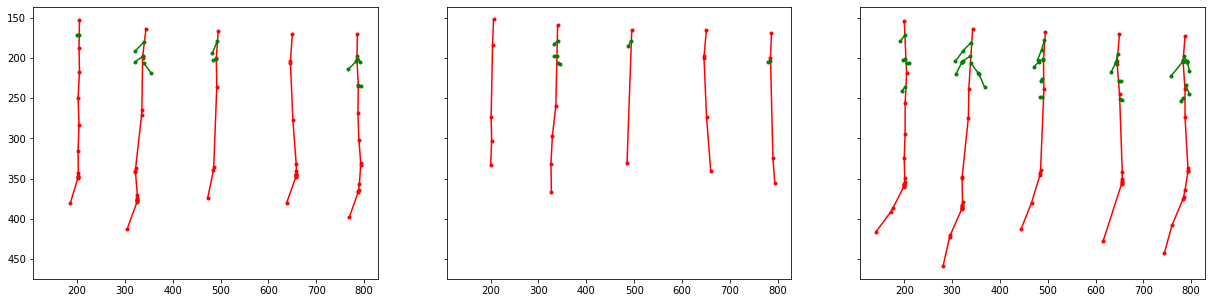

In [41]:
multiple_plot(files, image=False)

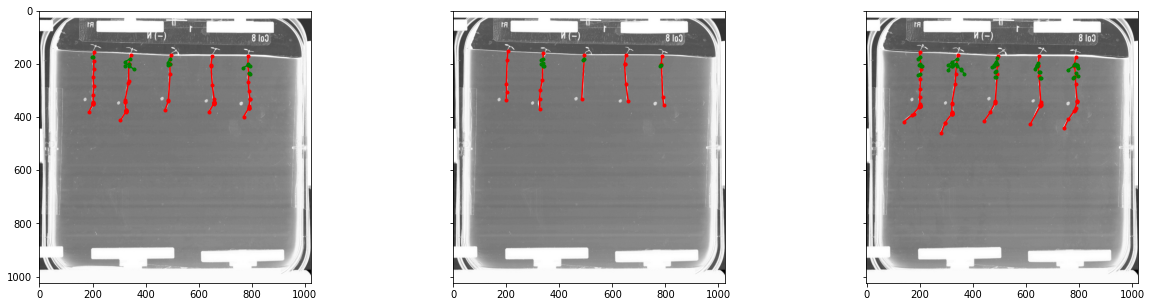

In [42]:
multiple_plot(files, image=True)

In [37]:
labels = g.property('label')
print(labels)
for rsml_file in files: 
    g = rsml.rsml2mtg(rsml_file)
    print(g)

    for v in g.vertices(scale=2):
        labels[v]='Axis'
    g.properties()['label']=labels

    g.display(display_id=True, display_scale=True)


{1: 'Plant', 2: 'Axis', 3: 'Axis', 4: 'Axis', 5: 'Axis', 6: 'Axis', 7: 'Axis', 8: 'Axis', 9: 'Axis', 10: 'Axis', 11: 'Axis', 12: 'Axis', 13: 'Axis', 14: 'Axis', 15: 'Axis', 16: 'Axis', 17: 'Axis', 18: 'Axis', 19: 'Axis', 20: 'Axis', 21: 'Axis', 22: 'Axis', 23: 'Plant', 24: 'Axis', 25: 'Axis', 26: 'Axis', 27: 'Axis', 28: 'Axis'}
MTG : nb_vertices=20, nb_scales=3
MTG : nb_vertices=20, nb_scales=3
/Plant			(id=1, scale=1)											
^/Axis			(id=2, scale=2)											
	+Axis			(id=3, scale=2)										
/Axis			(id=4, scale=1)											
^/Axis			(id=5, scale=2)											
	+Axis			(id=6, scale=2)										
	+Axis			(id=7, scale=2)										
	+Axis			(id=8, scale=2)										
/Axis			(id=9, scale=1)											
^/Axis			(id=10, scale=2)											
	+Axis			(id=11, scale=2)										
	+Axis			(id=12, scale=2)										
/Axis			(id=13, scale=1)											
^/Axis			(id=14, scale=2)											
/Axis			(id=15, scale=1)											
^/Axis			(id=16, scale=2)											
	+Axis			(id=17, scale=2)				

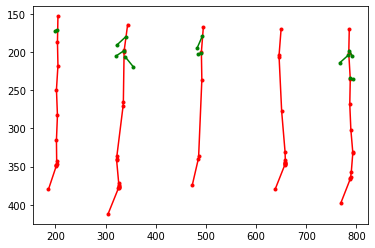

In [13]:
plot.plot2d(g)

In [43]:
g.property_names()

['edge_type', 'label', 'ID', 'geometry']

In [8]:

# Scale : 1
print('Nb Plants: ', g.nb_vertices(scale=1))

# Real plants
roots = g.component_roots_at_scale(0, scale=2)

print('Nb First order ', len(roots))
print('First order vids', roots)
print('Length of 1st order roots')
print([float(g.node(rid).length) for rid in roots])

orders = algo.orders(g)

laterals = {}
lengths = {}
insertions = {}
for rid in roots:
    total_length = float(g.node(rid).length)
    laterals[rid] = [ vid for vid in traversal.pre_order2(g, rid) if orders[vid] == 1]
    lengths[rid] = [float(g.node(vid).length) for vid in laterals[rid]]
    insertions[rid] = [total_length - float(g.node(vid).insertion) for vid in laterals[rid]]
    print('Nb laterals ', rid, 'is', len(laterals[rid]))
    print ('Length laterals ', rid, 'is', lengths[rid])
    


Nb Plants:  1
Nb First order  6
First order vids [2, 23, 24, 45, 67, 101]
Length of 1st order roots
[33.536945, 0.15486445, 29.506647, 32.945503, 24.281567, 30.632915]
Nb laterals  2 is 20
Length laterals  2 is [2.2178886, 6.5352187, 5.4497843, 5.4602523, 3.7157426, 0.8301312, 3.978765, 2.6007152, 0.95336854, 0.9644195, 0.51628274, 2.257227, 1.6528257, 2.4448996, 5.4162636, 3.8353221, 8.391615, 0.4948241, 7.422333, 0.92594594]
Nb laterals  23 is 0
Length laterals  23 is []
Nb laterals  24 is 20
Length laterals  24 is [4.8826466, 3.4244606, 2.7466435, 0.90676194, 5.8938103, 4.3325844, 2.54712, 3.1551237, 5.0200286, 0.7661697, 3.0856135, 2.2990532, 1.2192911, 1.5815969, 2.7571108, 7.509963, 5.036606, 6.244242, 0.19073406, 0.40077168]
Nb laterals  45 is 21
Length laterals  45 is [7.6541233, 8.530355, 2.6057575, 5.4715714, 5.6892033, 4.383833, 5.090256, 3.6031044, 3.0893168, 1.8492123, 2.0142677, 1.3079118, 1.1847087, 0.8404625, 0.67187715, 2.4815085, 2.4254713, 1.1298352, 3.671624, 9.1605

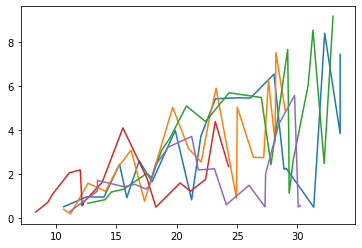

In [9]:
plt.clf()
for rid in lengths:
    if len(lengths[rid])>0:
        xy = np.array(sorted(zip(insertions[rid], lengths[rid]), key=lambda x: x[0]))
        plt.plot(xy.transpose()[0], xy.transpose()[1])
        

In [10]:
[min(insertions[rid]) for rid in roots if insertions[rid]]

[10.618999000000002,
 10.622402000000001,
 12.623029000000002,
 8.313623,
 11.127818999999999]

# TODO

## Convert the analysis into a csv
- plant (label)
- primary length
- # lateral root
- nude tip length
- lateral root label 
- lateral root length
- insertion angle


In [11]:
[g.label(r) for r in roots]

['rac_pl5', 'root_', 'primrootpl4', 'rpl3', 'prpl2', 'racpl1']

In [13]:
for rid in laterals:
    ll = laterals[rid]
    angles = [g.node(v).angle for v in ll ]
    print(angles)

['64.38947738127416', '42.785179225173636', '43.7311604252204', '67.2710522298325', '53.02628290442071', '48.61007383238723', '56.3834984664004', '58.071852927335854', '69.62448953100878', '77.57208398885727', '57.940303483921404', '36.34228910185728', '24.65722879055615', '68.72958448557537', '61.5588830646808', '51.997547132390075', '71.97694328494457', '45.72315777589794', '30.992065321202897', '32.61295117351696']
[]
['42.71633091833991', '56.846954122342446', '55.22702449651218', '56.38052050392228', '47.11592897031192', '58.16706576436583', '60.53379461366695', '65.58906350520351', '31.00523392592268', '51.352340142633984', '50.81261859441958', '83.91786248255438', '70.04746948592933', '71.3961449790617', '62.91761259627144', '44.173510796627106', '55.01780214185635', '65.80861310588439', '77.10683882335269', '103.4504139992283']
['26.66453942535286', '43.88295454933476', '77.2451364936671', '58.19941354027501', '25.1443032406481', '47.284142869190994', '63.31418703986072', '61.4